In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [3]:
colab_path = "/content/drive/MyDrive/FYP Google Colab/"

In [4]:
real_train_results = pd.read_csv(os.path.join(colab_path, "real/runs/train_real/results.csv"))
# synthetic_train_results = pd.read_csv(os.path.join(colab_path, "synthetic/runs/train/results.csv"))
mixed100_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train/results.csv"))
mixed25_train_results = pd.read_csv(os.path.join(colab_path, "real/runs/train_real_synthetic_25/results.csv"))
mixed50_train_results = pd.read_csv(os.path.join(colab_path, "real/runs/train_real_synthetic_50/results.csv"))
mixed75_train_results = pd.read_csv(os.path.join(colab_path, "real/runs/train_real_synthetic_75/results.csv"))

In [ ]:
real_train_results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,2.43740,4.76840,2.44570,0.00167,0.75,0.05243,0.00549,2.1477,5.63570,1.6758,0.099010,0.000010,0.000010
1,1,1.97140,4.26230,2.00210,0.00167,0.75,0.04538,0.00481,2.1408,5.71980,1.6727,0.097030,0.000030,0.000030
2,2,1.90900,4.97410,2.02890,0.00167,0.75,0.04358,0.00473,2.1642,5.70030,1.6827,0.095049,0.000049,0.000049
3,3,2.30300,4.73900,2.16370,0.00222,1.00,0.15477,0.07542,2.0956,4.12260,1.9852,0.093068,0.000068,0.000068
4,4,1.58210,3.31290,1.70950,0.00222,1.00,0.01968,0.00801,2.6764,4.04680,2.6611,0.091086,0.000086,0.000086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.89065,0.82376,1.09900,0.97897,1.00,0.99500,0.66538,1.3382,0.82591,1.4621,0.000069,0.000069,0.000069
96,96,0.75794,0.77150,0.99488,0.97897,1.00,0.99500,0.66538,1.3382,0.82591,1.4621,0.000060,0.000060,0.000060
97,97,1.14510,0.92170,1.21550,0.97993,1.00,0.99500,0.66515,1.3105,0.80200,1.4586,0.000050,0.000050,0.000050
98,98,0.84913,0.91890,1.06640,0.97993,1.00,0.99500,0.66515,1.3105,0.80200,1.4586,0.000040,0.000040,0.000040


In [5]:
real_train_results.columns = real_train_results.columns.str.strip()
print(real_train_results.columns)

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [6]:
mixed100_train_results.columns = mixed100_train_results.columns.str.strip()
mixed25_train_results.columns = mixed25_train_results.columns.str.strip()
mixed50_train_results.columns = mixed50_train_results.columns.str.strip()
mixed75_train_results.columns = mixed75_train_results.columns.str.strip()

In [6]:
mixed_train_results.columns = mixed_train_results.columns.str.strip()
print(mixed_train_results.columns)

Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


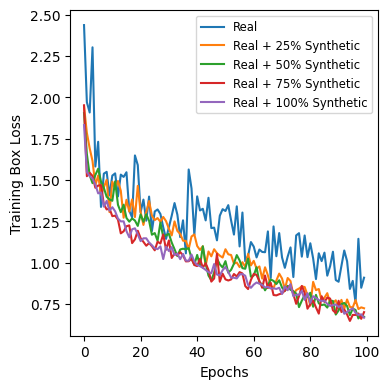

In [29]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['train/box_loss'], label='Real')
axs.plot(mixed25_train_results['epoch'], mixed25_train_results['train/box_loss'], label='Real + 25% Synthetic')
axs.plot(mixed50_train_results['epoch'], mixed50_train_results['train/box_loss'], label='Real + 50% Synthetic')
axs.plot(mixed75_train_results['epoch'], mixed75_train_results['train/box_loss'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['train/box_loss'], label='Real + 100% Synthetic')
axs.set_ylabel('Training Box Loss')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# # Plot validation box loss
# axs[1].plot(real_train_results['epoch'], real_train_results['val/box_loss'], label='Real')
# axs[1].plot(mixed_train_results['epoch'], mixed_train_results['val/box_loss'], label='Real+Synthetic')
# axs[1].set_ylabel('Validation Box Loss')
# axs[1].legend()

# # Plot mAP@50
# axs[2].plot(real_train_results['epoch'], real_train_results['metrics/mAP50(B)'], label='Real')
# axs[2].plot(mixed_train_results['epoch'], mixed_train_results['metrics/mAP50(B)'], label='Real+Synthetic')
# axs[2].set_ylabel('mAP@50')
# axs[2].set_xlabel('Epoch')
# axs[2].legend()

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

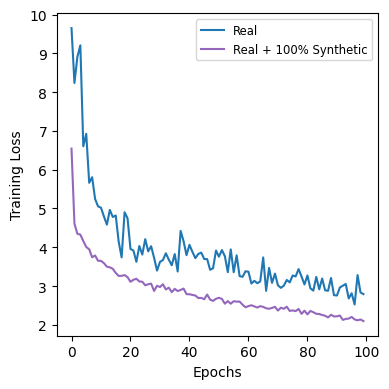

In [14]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], total_loss_real, label='Real')
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['train/cls_loss'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['train/cls_loss'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['train/cls_loss'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], total_loss_mixed_100, label='Real + 100% Synthetic', color='C4')
axs.set_ylabel('Training Loss')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

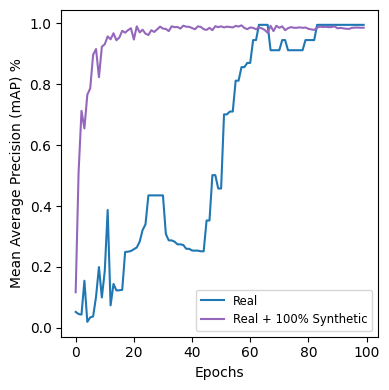

In [15]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50(B)'], label='Real')
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['train/cls_loss'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['train/cls_loss'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['train/cls_loss'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic', color='C4')
axs.set_ylabel('Mean Average Precision (mAP) %')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

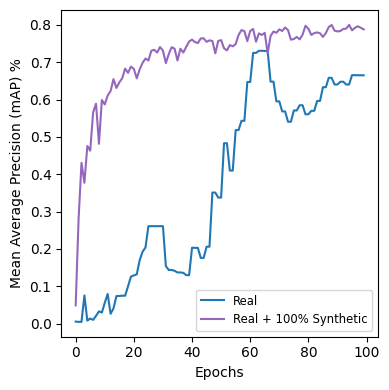

In [12]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50-95(B)'], label='Real')
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['train/cls_loss'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['train/cls_loss'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['train/cls_loss'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50-95(B)'], label='Real + 100% Synthetic', color='C4')
axs.set_ylabel('Mean Average Precision (mAP) %')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

In [7]:
total_loss_real = real_train_results['train/box_loss'] + real_train_results['train/cls_loss'] + real_train_results['train/dfl_loss']
total_loss_mixed_25 = mixed25_train_results['train/box_loss'] + mixed25_train_results['train/cls_loss'] + mixed25_train_results['train/dfl_loss']
total_loss_mixed_50 = mixed50_train_results['train/box_loss'] + mixed50_train_results['train/cls_loss'] + mixed50_train_results['train/dfl_loss']
total_loss_mixed_75 = mixed75_train_results['train/box_loss'] + mixed75_train_results['train/cls_loss'] + mixed75_train_results['train/dfl_loss']
total_loss_mixed_100 = mixed100_train_results['train/box_loss'] + mixed100_train_results['train/cls_loss'] + mixed100_train_results['train/dfl_loss']

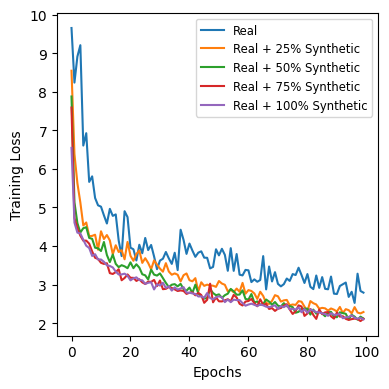

In [40]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], total_loss_real, label='Real')
axs.plot(mixed25_train_results['epoch'], total_loss_mixed_25, label='Real + 25% Synthetic')
axs.plot(mixed50_train_results['epoch'], total_loss_mixed_50, label='Real + 50% Synthetic')
axs.plot(mixed75_train_results['epoch'], total_loss_mixed_75, label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], total_loss_mixed_100, label='Real + 100% Synthetic')
axs.set_ylabel('Training Loss')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

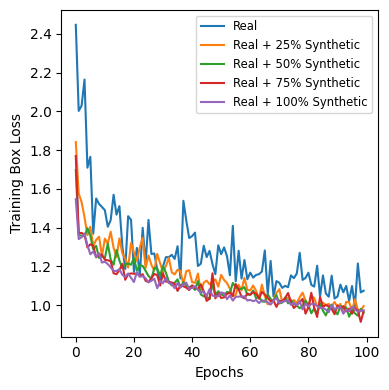

In [36]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['train/dfl_loss'], label='Real')
axs.plot(mixed25_train_results['epoch'], mixed25_train_results['train/dfl_loss'], label='Real + 25% Synthetic')
axs.plot(mixed50_train_results['epoch'], mixed50_train_results['train/dfl_loss'], label='Real + 50% Synthetic')
axs.plot(mixed75_train_results['epoch'], mixed75_train_results['train/dfl_loss'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['train/dfl_loss'], label='Real + 100% Synthetic')
axs.set_ylabel('Training Box Loss')
axs.set_xlabel('Epochs')
axs.legend(fontsize='small')

# Show the plot
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

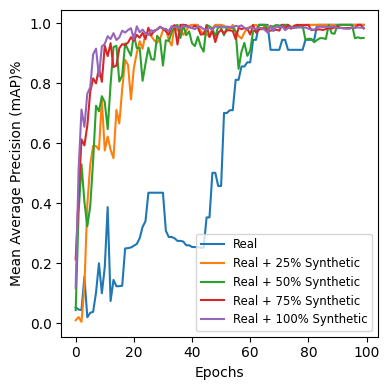

In [7]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50(B)'], label='Real')
axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

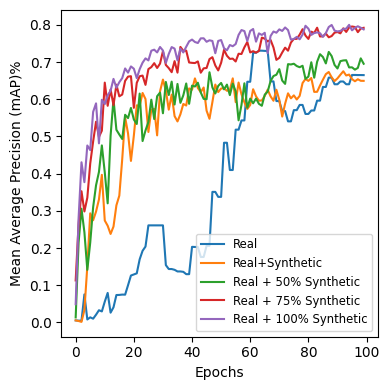

In [8]:

fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50-95(B)'], label='Real')
axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50-95(B)'], label='Real+Synthetic')
axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50-95(B)'], label='Real + 50% Synthetic')
axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50-95(B)'], label='Real + 75% Synthetic')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50-95(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5:0.95 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

In [9]:
percentage_synthetic = [0,25,50,75,100]
map95s = [0.515,0.55,0.498,0.531,0.574]
map50s = [0.746,0.84,0.833,0.868,0.878]
precision = [0.706,0.815,0.747,0.856,0.917]
recall = [0.714,0.714,0.844,0.849,0.786]

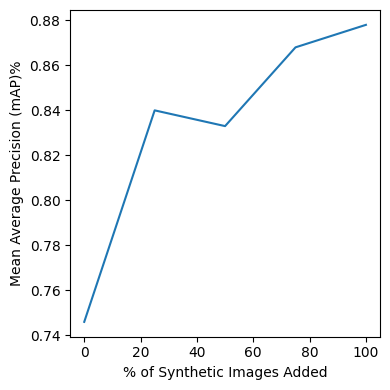

In [14]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(percentage_synthetic, map50s)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('% of Synthetic Images Added')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

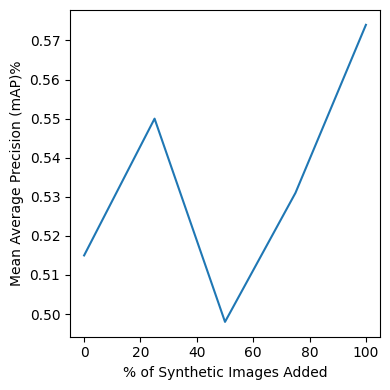

In [15]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(percentage_synthetic, map95s)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('% of Synthetic Images Added')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

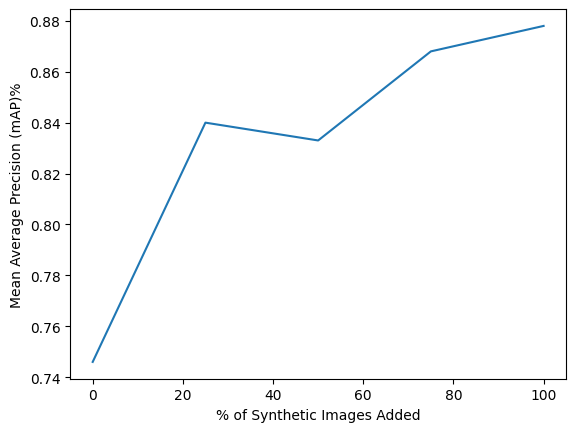

In [10]:
plt.plot(percentage_synthetic, map50s)
plt.ylabel('Mean Average Precision (mAP)%')
plt.xlabel('% of Synthetic Images Added')
# plt.title('mAP@0.5 on Test Set')
plt.show()

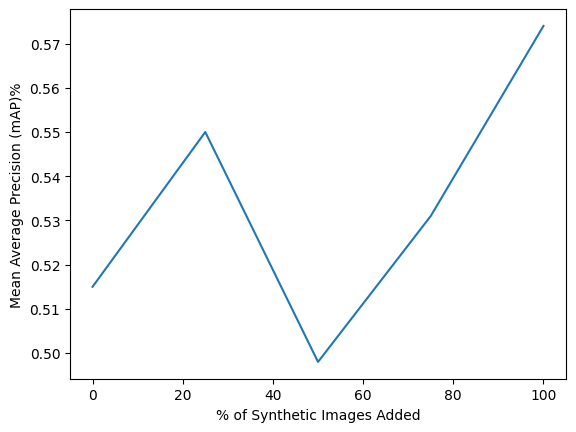

In [11]:
plt.plot(percentage_synthetic, map95s)
plt.ylabel('Mean Average Precision (mAP)%')
plt.xlabel('% of Synthetic Images Added')
# plt.title('mAP@0.5:0.95 Test Set')
plt.show()

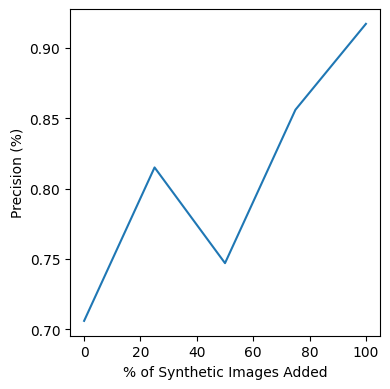

In [23]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(percentage_synthetic, precision)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Precision (%)')
axs.set_xlabel('% of Synthetic Images Added')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

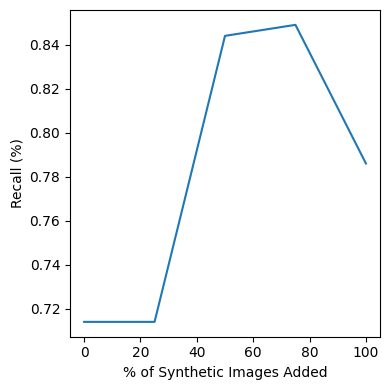

In [24]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(percentage_synthetic, recall)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Recall (%)')
axs.set_xlabel('% of Synthetic Images Added')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

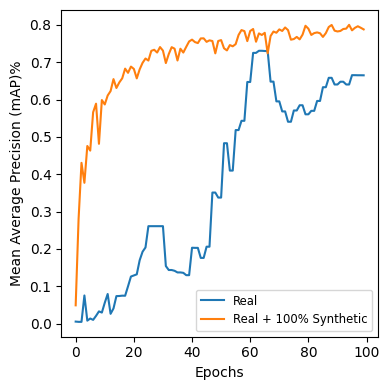

In [9]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50-95(B)'], label='Real')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50-95(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5:0.95 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

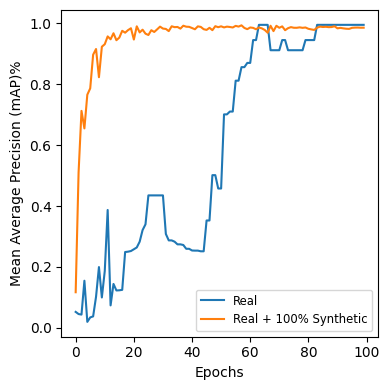

In [10]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(real_train_results['epoch'], real_train_results['metrics/mAP50(B)'], label='Real')
axs.plot(mixed100_train_results['epoch'], mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5:0.95 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

In [19]:
num_params = [3.2,11.2,25.9,43.7,68.2]
fps = [93.5,93.5,78.1,67.1,61.7]
map5095 = [0.574,0.55,0.507,0.361,0.425]

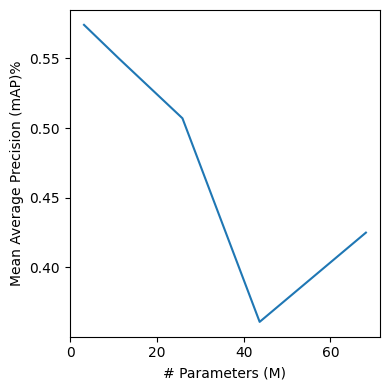

In [20]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(num_params, map5095)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('# Parameters (M)')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

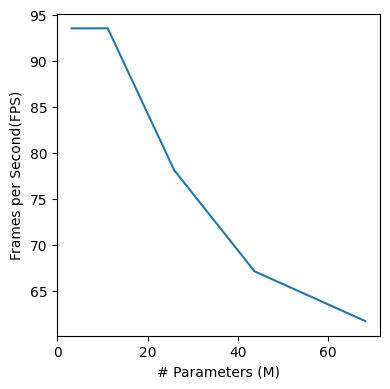

In [22]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(num_params, fps)
# axs.plot(mixed25_train_results['epoch'], mixed25_train_results['metrics/mAP50(B)'], label='Real + 25% Synthetic')
# axs.plot(mixed50_train_results['epoch'], mixed50_train_results['metrics/mAP50(B)'], label='Real + 50% Synthetic')
# axs.plot(mixed75_train_results['epoch'], mixed75_train_results['metrics/mAP50(B)'], label='Real + 75% Synthetic')
# axs.plot(percentage_synthetic, mixed100_train_results['metrics/mAP50(B)'], label='Real + 100% Synthetic')
axs.set_ylabel('Frames per Second(FPS)')
axs.set_xlabel('# Parameters (M)')
# axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

In [25]:
nano_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train_nano/results.csv"))
# synthetic_train_results = pd.read_csv(os.path.join(colab_path, "synthetic/runs/train/results.csv"))
small_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train_small/results.csv"))
medium_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train_medium/results.csv"))
large_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train_large/results.csv"))
xlarge_train_results = pd.read_csv(os.path.join(colab_path, "synthetic_and_real/train_xlarge/results.csv"))

In [26]:
nano_train_results.columns = nano_train_results.columns.str.strip()
small_train_results.columns = small_train_results.columns.str.strip()
medium_train_results.columns = medium_train_results.columns.str.strip()
large_train_results.columns = large_train_results.columns.str.strip()
xlarge_train_results.columns = xlarge_train_results.columns.str.strip()

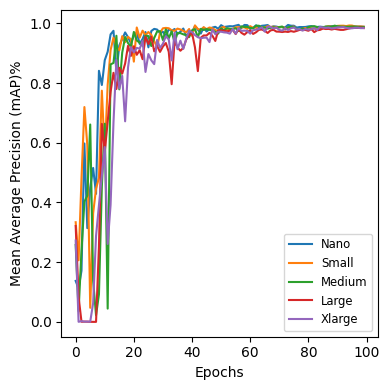

In [27]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(nano_train_results['epoch'], nano_train_results['metrics/mAP50(B)'], label='Nano')
axs.plot(small_train_results['epoch'], small_train_results['metrics/mAP50(B)'], label='Small')
axs.plot(medium_train_results['epoch'], medium_train_results['metrics/mAP50(B)'], label='Medium')
axs.plot(large_train_results['epoch'], large_train_results['metrics/mAP50(B)'], label='Large')
axs.plot(xlarge_train_results['epoch'], xlarge_train_results['metrics/mAP50(B)'], label='Xlarge')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

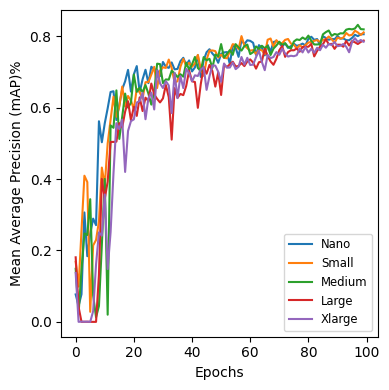

In [32]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(nano_train_results['epoch'], nano_train_results['metrics/mAP50-95(B)'], label='Nano')
axs.plot(small_train_results['epoch'], small_train_results['metrics/mAP50-95(B)'], label='Small')
axs.plot(medium_train_results['epoch'], medium_train_results['metrics/mAP50-95(B)'], label='Medium')
axs.plot(large_train_results['epoch'], large_train_results['metrics/mAP50-95(B)'], label='Large')
axs.plot(xlarge_train_results['epoch'], xlarge_train_results['metrics/mAP50-95(B)'], label='Xlarge')
axs.set_ylabel('Mean Average Precision (mAP)%')
axs.set_xlabel('Epochs')
axs.legend(loc='lower right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()

In [29]:
total_loss_nano = nano_train_results['train/box_loss'] + nano_train_results['train/cls_loss'] + nano_train_results['train/dfl_loss']
total_loss_small =small_train_results['train/box_loss'] + small_train_results['train/cls_loss'] + small_train_results['train/dfl_loss']
total_loss_medium = medium_train_results['train/box_loss'] + medium_train_results['train/cls_loss'] + medium_train_results['train/dfl_loss']
total_loss_large = large_train_results['train/box_loss'] + large_train_results['train/cls_loss'] + large_train_results['train/dfl_loss']
total_loss_xlarge = xlarge_train_results['train/box_loss'] + xlarge_train_results['train/cls_loss'] + xlarge_train_results['train/dfl_loss']

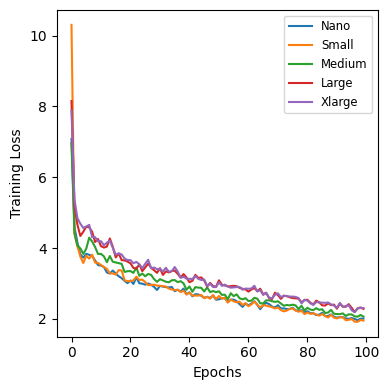

In [31]:
fig, axs = plt.subplots(1, figsize=(4,4))
# Plot training box loss
axs.plot(nano_train_results['epoch'], total_loss_nano, label='Nano')
axs.plot(small_train_results['epoch'],total_loss_small, label='Small')
axs.plot(medium_train_results['epoch'], total_loss_medium, label='Medium')
axs.plot(large_train_results['epoch'], total_loss_large, label='Large')
axs.plot(xlarge_train_results['epoch'], total_loss_xlarge, label='Xlarge')
axs.set_ylabel('Training Loss')
axs.set_xlabel('Epochs')
axs.legend(loc='upper right',fontsize='small')
# plt.title('mAP@0.5 on Validation Set During Training')
plt.tight_layout()
# plt.title("Training Box Loss")
plt.show()